In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_text.csv to cleaned_text (1).csv
Saving Company Descriptions.xlsx to Company Descriptions (2).xlsx
Saving Industry Segments - Top 10 Keywords.xlsx to Industry Segments - Top 10 Keywords (2).xlsx


In [1]:
import csv
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [30]:
df = pd.read_excel('Company Descriptions.xlsx')

In [31]:
df.head()

,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...


In [32]:
df.columns

Index(['company_name', 'company_short_description', 'company_description'], dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 3 columns):
company_name                 19965 non-null object
company_short_description    19965 non-null object
company_description          19237 non-null object
dtypes: object(3)
memory usage: 468.1+ KB


# Text Pre Processing for long description columns ( removing stop words numbers etc...)

In [34]:
for i in df.company_description.iloc[:3]:
    print(i,'\n')

Codementor provides live 1:1 help for software development.  We’re making it easy for developers to connect with experts via screen sharing, video and chat.  There are two ways to get help: on-demand live 1:1 expert help, and long-term dedicated mentorship. 

Build projects faster with on-demand help for topics including Ruby, Python, PHP, JavaScript, CSS/HTML, iOS, Swift and more. Codementor helps you overcome key challenges with timely advice and speeds up your development process. 

AgShift solution blends Deep Learning with Computer Vision to autonomously inspect produce and other commodities for defects. It does quality assessments and makes judgements as per USDA specifications or organizations' own specifications. The patented deep learning models analyze the defects in the sample images and predict the overall quality of the sample. The platform relies on curated, extensive real-world image data sets to teach our software to analyze defects with high consistency and accuracy - 

In [35]:
for i in df.company_short_description.iloc[:3]:
    print(i,'\n')

Codementor is an online marketplace connecting developers with experts for on-demand 1:1 help via screen sharing, video, and text chat. 

AgShift is designing world's most advanced autonomous food inspection system using deep learning 

Shipsi empowers any retailer with the ability to offer an easy “Instant Delivery” option on their checkout page. 



In [36]:
df['company_short_description'] = df['company_short_description'].str.lower()

In [37]:
df['company_description'] = df['company_description'].str.lower()

In [38]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# remove stopwords

In [40]:

from nltk.corpus import stopwords
st = set(stopwords.words('english'))

In [41]:
def remove_str(text):
    return " ".join([word for word in str(text).split() if word not in st])

In [42]:
df['company_description'] = df['company_description'].apply(lambda text: remove_str(text))
df['company_short_description'] = df['company_short_description'].apply(lambda text: remove_str(text))


In [43]:
df.head()

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,codementor provides live 1:1 help software dev...
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ..."
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...


# Remove Numbers 

In [44]:
def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text



In [45]:
df['company_description'] = df['company_description'].apply(lambda text: removeNumbers(text))
df.head()

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,codementor provides live : help software devel...
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ..."
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...


In [46]:
df['company_short_description'] = df['company_short_description'].apply(lambda text: removeNumbers(text))
df.head()

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,codementor provides live : help software devel...
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ..."
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...


# Remove Punctuation

In [47]:
punc = string.punctuation
punc 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def remove_punc(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in punc])

In [49]:
df['company_description'] = df['company_description'].apply(lambda text: remove_punc(text))
df.head()

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,codementor provides live help software develop...
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ..."
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...


In [50]:
df['company_short_description'] = df['company_short_description'].apply(lambda text: remove_punc(text))
df.head()

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,codementor provides live help software develop...
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ..."
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...


# get length of short description column and comp desc column

In [51]:
df['len of long desc'] =df['company_description'].apply(len)

In [52]:
df['len of short desc'] =df['company_short_description'].apply(len)

In [29]:
df.head()

,company_name,company_short_description,company_description,len of long desc,len of short desc
0,Codementor,codementor online marketplace connecting devel...,codementor live help development. we’re making...,384,112
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...,539,88
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...,235,84
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ...",220,106
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...,463,66


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

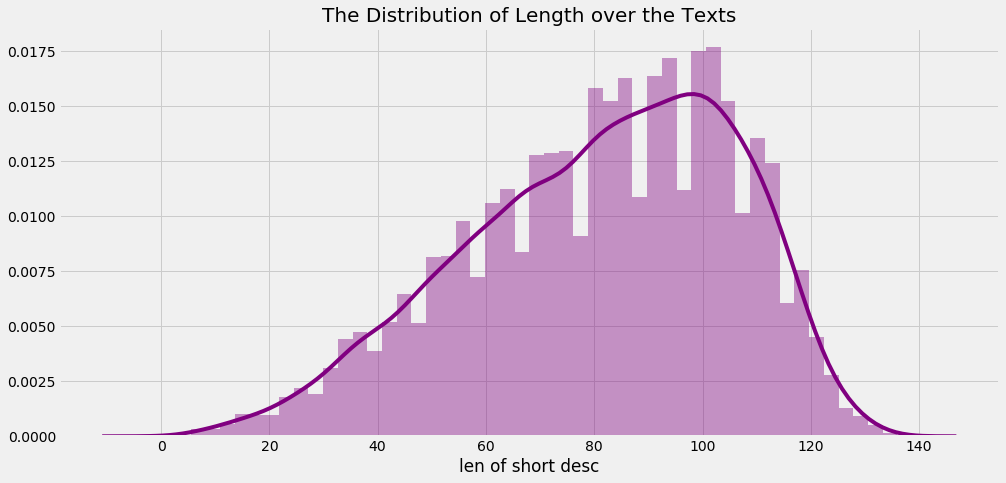

In [74]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(df['len of short desc'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

Text(0.5, 1.0, 'The Distribution of Length over the Texts')

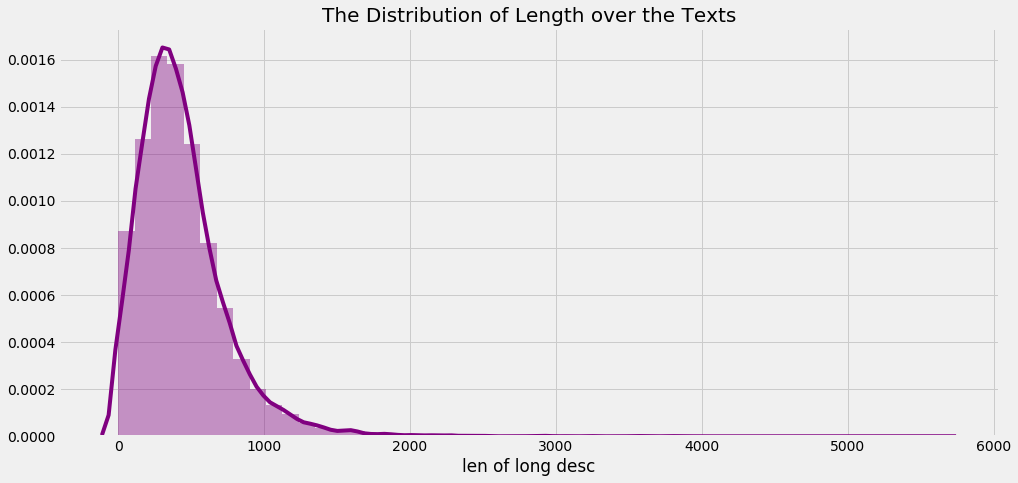

In [75]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(df['len of long desc'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

In [0]:
#saving processed data as csv

df.to_csv('cleaned_text.csv')

Text(0.5, 1.0, 'WordCloud ')

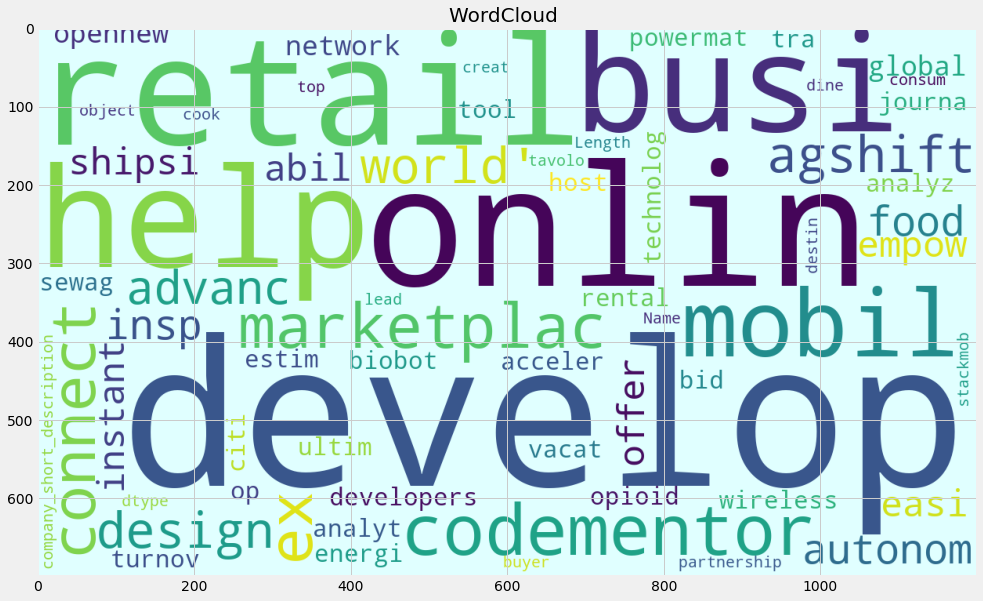

In [42]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(df['company_short_description']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

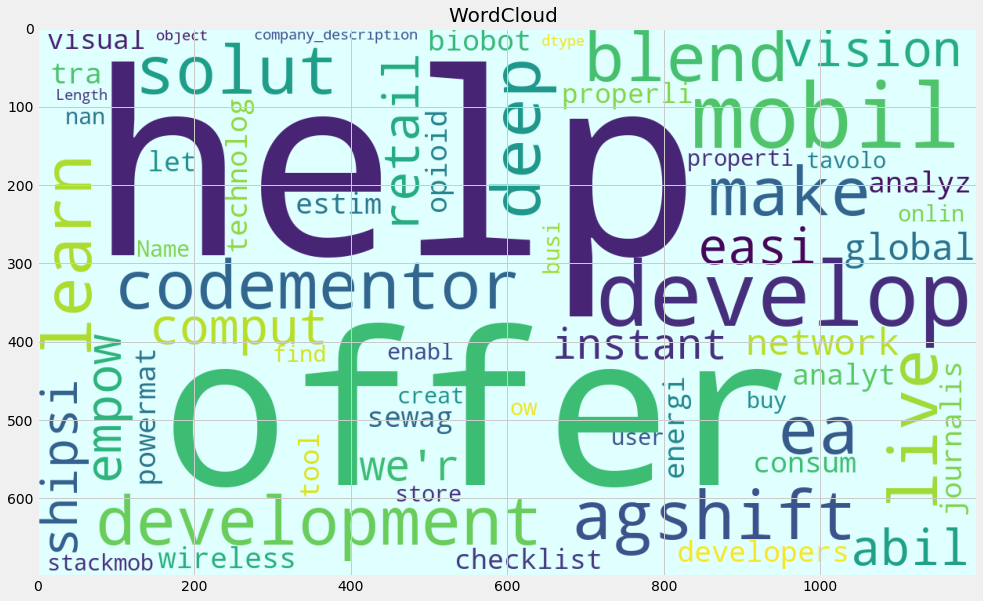

In [43]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(df['company_description']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

# Most frequent occusing word 

Text(0.5, 1.0, 'Most Frequently Occuring Words In company Description - Top 20')

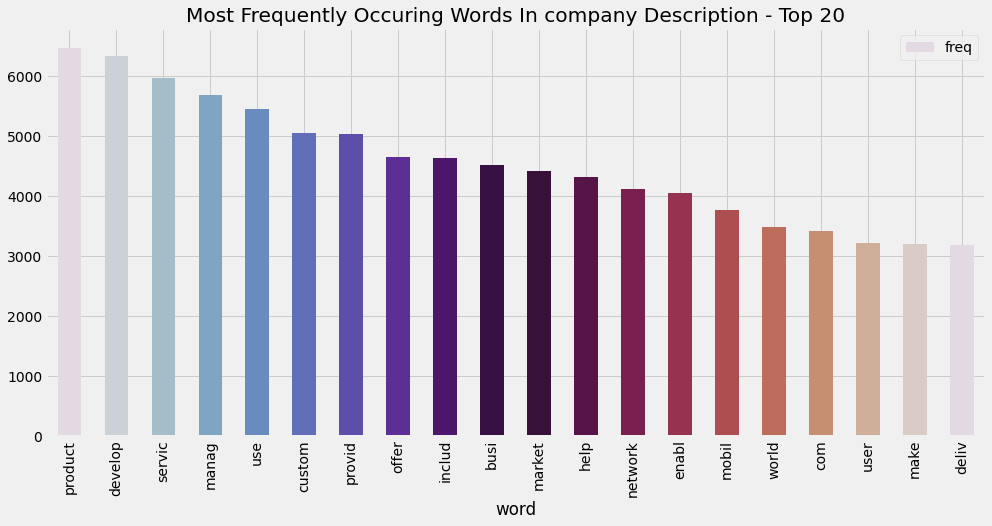

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['company_description'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words In company Description - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words In company_short_description - Top 20')

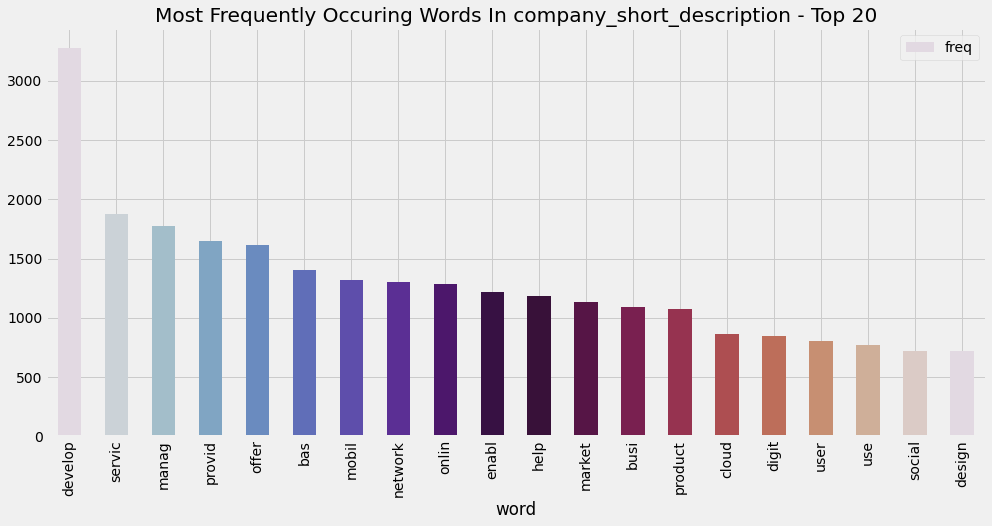

In [45]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['company_short_description'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words In company_short_description - Top 20")

# Part 1


#### 3.1: Classify these companies based on their descriptions to only one of the industries from the industry labels given (provided in the file: Industry Segments – Top 10 Keywords).

In [6]:
df1 = pd.read_excel('Industry Segments - Top 10 Keywords.xlsx')

In [47]:
df1 

,Industry segment,Tags
0,Aerospace and defense,"Security, systems, video, surveillance, servic..."
1,Agriculture and forestry,"Service, cleantech, water, agriculture, traits..."
2,Biopharmaceuticals,"Developer, treatment, drug, diseases, technolo..."
3,Business support services,"Service, platform, online, management, data, m..."
4,Communications and networking,"Service, wireless, network, data, internet, ap..."
5,Construction and civil engineering,"Service, cleantech, water, energy, waste, trea..."
6,Consumer information services,"Online, users, web, service, platform, social,..."
7,Electronics and computer hardware,"Technology, storage, energy, systems, applicat..."
8,Financial institutions and services,"Service, financial, payment, online, platform,..."
9,Food and beverage,"Food, organic, tea, beverages, ingredients, na..."


# Build a text classifier Model

In [10]:
df1['Tags'] = df1['Tags'].str.lower()

In [16]:
df1['Tags'] = df1['Tags'].str.replace(',','')


In [17]:
df1.head()

,Industry segment,Tags
0,Aerospace and defense,security systems video surveillance service ai...
1,Agriculture and forestry,service cleantech water agriculture traits foo...
2,Biopharmaceuticals,developer treatment drug diseases technology d...
3,Business support services,service platform online management data market...
4,Communications and networking,service wireless network data internet applica...


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [29]:
X = df1['Tags']
y = df1['Industry segment']

In [30]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                       ('clf', MultinomialNB()),
                       ])

In [23]:

text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                         ('clf',LinearSVC())
                         ])

In [31]:
text_clf_nb.fit(X, y)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:

#Feed the training data through the second pipeline¶
#run Linear SVC
text_clf_lsvc.fit(X, y)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

# test the model on demo description

In [36]:
desc1= "MedCases focuses on the development of medical e-learning solutions for the pharmaceutical and biotechnology industry.MedCases offers ADHD Point of Care CME Program that focuses on educating physicians on the diagnosis and treatment of attention-deficit hyperactivity disorder.MedCases was acquired by Indegene Lifesystems in November 2006.MedCases was founded in 1971 and is based in Princeton, New Jersey."



In [37]:
desc2 ="SpeedDate.com is one of a slew of new online, webcam enhanced, speed dating sites.  SpeedDate.com allows singles to go on multiple real-time 3-minute online dates from home using a webcam, microphone and instant messaging.  The underlying idea is that SpeedDate.com will let you see who you have chemistry with before you actually meet them in person.There are no lengthy profiles with photos, chains of vague emails or even much of what you might find through a site like eHarmony or Match.com.  SpeedDate.com sets you up for 3 minutes with another person via webcam to see if you'll click.The site takes a fairly serious approach to the space and expects to help users find significant others.  It has plans to roll out a premium for pay edition for serious users.  MeetYu, a competitor, takes a more playful approach to their product hoping to expand its user base to those who just want a fun and flirtatious video chat."

In [43]:
desc3 = "Tigera provides Zero Trust network security and continuous compliance for Kubernetes platforms.Tigera Secure extends enterprise security and compliance controls to Kubernetes environments with support for on-premises, multi-cloud, and legacy environments.Tigera powers all of the major Hosted Kubernetes environments including Amazon EKS, Azure AKS, Google GKE, and IBM Container Service. Tigera is also integrated with the major on-premises Kubernetes deployments and is shipped “batteries included” in Docker EE and fully integrated with Red Hat OpenShift.Tigera Secure builds on leading open source projects: Kubernetes, Calico, and Istio, which Tigera engineers maintain and contribute to as active members of the cloud-native community. Our employees are experts in securing Kubernetes and our technology is deployed in the largest SaaS, financial services, gaming, and retail companies where security and compliance are critical to the business."

In [38]:
print(text_clf_nb.predict([desc2])) 

['Consumer information services']


In [39]:
print(text_clf_nb.predict([desc1])) 

['Healthcare services']


In [44]:
print(text_clf_nb.predict([desc3])) 

['Aerospace and defense']


In [76]:
df.head()

,company_name,company_short_description,company_description,len of long desc,len of short desc
0,Codementor,codementor online marketplace connecting devel...,codementor live help development. we’re making...,384,112
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...,539,88
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...,235,84
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ...",220,106
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...,463,66


# Apply Text Classification model on the data frame

In [77]:
#save the company desc to sep data frame
df_comp = df['company_description']

In [78]:
df_comp

0        codementor live help development. we’re making...
1        agshift solution blends deep learning computer...
2        shipsi empowers retailer ability offer easy “i...
3        we're helping global network developers, journ...
4        biobot analytics analyzes sewage estimate opio...
                               ...                        
19960    powermat technologies developer wireless energ...
19961    properly visual checklist tool lets property o...
19962                                                  nan
19963    tavolo offers online store enables users find ...
19964    stackmob’s mobile helps developers create mobi...
Name: company_description, Length: 19965, dtype: object

In [81]:
predictions_industry = text_clf_nb.predict(df_comp)


In [82]:
predictions_industry

array(['Biopharmaceuticals', 'Media and content',
       'Communications and networking', ..., 'Aerospace and defense',
       'Consumer information services', 'Software'], dtype='<U41')

# Attaching the prediction outputs as a separate column to the dataframe 

In [85]:
df['Predicted_Industry'] = predictions_industry

In [89]:
df.head()

,company_name,company_short_description,company_description,len of long desc,len of short desc,Predicted_Industry
0,Codementor,codementor online marketplace connecting devel...,codementor live help development. we’re making...,384,112,Biopharmaceuticals
1,AgShift,agshift designing world's advanced autonomous ...,agshift solution blends deep learning computer...,539,88,Media and content
2,Shipsi,shipsi empowers retailer ability offer easy “i...,shipsi empowers retailer ability offer easy “i...,235,84,Communications and networking
3,OpenNews,"opennews helps global network developers, jour...","we're helping global network developers, journ...",220,106,Media and content
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...,463,66,Medical software and information services


Text(0.5, 1.0, 'Most Frequently Occuring Words In company Description - Top 20')

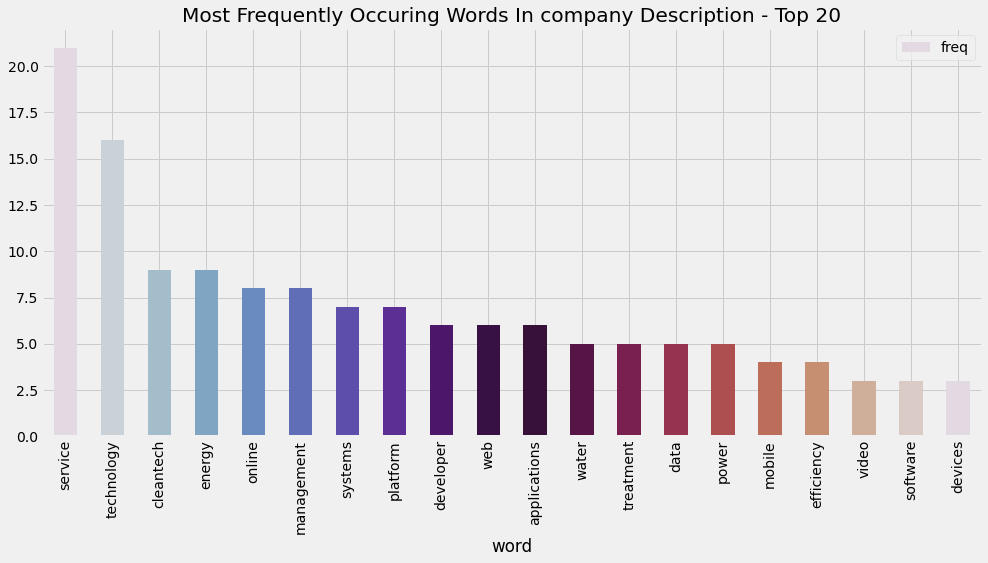

In [48]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df1['Tags'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words In company Description - Top 20")

# Part 2

# Cluster the companies using only their description. Identify and justify the optimal number of clusters. Do not use the Industry labels for this task. 

In [53]:
df_clean= pd.read_csv('Preprocessed_text.csv')

In [54]:
df_clean.head()

,Unnamed: 0,company_name,company_short_description,company_description,len of long desc,len of short desc
0,0,Codementor,codementor online marketplace connecting devel...,codementor provides live help software develop...,383,108
1,1,AgShift,agshift designing worlds advanced autonomous f...,agshift solution blends deep learning computer...,553,87
2,2,Shipsi,shipsi empowers retailer ability offer easy in...,shipsi empowers retailer ability offer easy in...,235,81
3,3,OpenNews,opennews helps global network developers journ...,were helping global network developers journal...,216,106
4,4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,biobot analytics analyzes sewage estimate opio...,462,65


In [55]:
df_clean = df_clean[['company_name','company_description','company_short_description']]

In [56]:
df_clean.head()

,company_name,company_description,company_short_description
0,Codementor,codementor provides live help software develop...,codementor online marketplace connecting devel...
1,AgShift,agshift solution blends deep learning computer...,agshift designing worlds advanced autonomous f...
2,Shipsi,shipsi empowers retailer ability offer easy in...,shipsi empowers retailer ability offer easy in...
3,OpenNews,were helping global network developers journal...,opennews helps global network developers journ...
4,Biobot Analytics,biobot analytics analyzes sewage estimate opio...,biobot analytics analyzes city sewage estimate...


In [59]:
df_clean.company_description.fillna(df_clean.company_short_description, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 3 columns):
company_name                 19965 non-null object
company_description          19965 non-null object
company_short_description    19965 non-null object
dtypes: object(3)
memory usage: 468.1+ KB


In [0]:
#Vectrorizing text data using TfidVectrorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_clean['company_description'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (19965, 68418)


In [61]:
df_clean.head()

,company_name,company_description,company_short_description
0,Codementor,codementor provides live help software develop...,codementor online marketplace connecting devel...
1,AgShift,agshift solution blends deep learning computer...,agshift designing worlds advanced autonomous f...
2,Shipsi,shipsi empowers retailer ability offer easy in...,shipsi empowers retailer ability offer easy in...
3,OpenNews,were helping global network developers journal...,opennews helps global network developers journ...
4,Biobot Analytics,biobot analytics analyzes sewage estimate opio...,biobot analytics analyzes city sewage estimate...


In [67]:
from sklearn.cluster import KMeans

In [71]:
true_k = 15
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,random_state=42)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=15, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [72]:
# Get the cluster centroids
print(model.cluster_centers_)
    
# Get the cluster labels
print(model.labels_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.80271593e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.90274558e-05 1.90274558e-05 1.90274558e-05 ... 0.00000000e+00
  0.00000000e+00 2.37324146e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[13 13 13 ... 13  8  3]


In [70]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 technology
 platform
 online
 products
 company
 new
 companies
 industry
 help
 make
Cluster 1:
 networks
 wireless
 communications
 network
 services
 service
 broadband
 solutions
 internet
 optical
Cluster 2:
 data
 analytics
 platform
 business
 big
 storage
 cloud
 learning
 software
 machine
Cluster 3:
 mobile
 app
 apps
 platform
 users
 devices
 provides
 company
 application
 services
Cluster 4:
 company
 based
 california
 founded
 san
 francisco
 headquartered
 new
 united
 offers
Cluster 5:
 health
 care
 healthcare
 patients
 patient
 providers
 clinical
 company
 physicians
 medical
Cluster 6:
 security
 cloud
 threats
 network
 cyber
 threat
 data
 solutions
 organizations
 provides
Cluster 7:
 medical
 device
 company
 surgical
 devices
 treatment
 patients
 technology
 developing
 based
Cluster 8:
 people
 social
 users
 share
 music
 friends
 online
 app
 way
 community
Cluster 9:
 marketing
 customer
 sales
 customers
 platform
 br

# So from the output we can infer following points:

    Clusterr 1 classifies text related to ' patient, develop, treatment, surgic, devic, clinic, tissu, therapi, implant'
    this can be associated to ' Healthcare'
Cluster 0 classifies text related to 'energi, manufactur, power, product, develop, desig, solar, semiconductor.,  high
 cost which can be associated to 'Manufacturing Hardware '

 Cluster 2 classifies text related to 'video, content, media, network, tv, share, live, digit, stream, user'
this can be associated to ' Online streaming company'

# find optimal no of clusters 

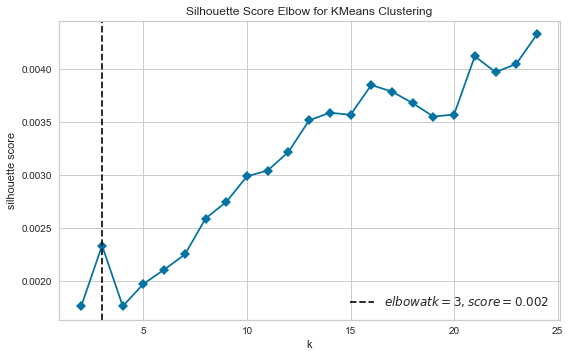

In [73]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
#model = KMeans()

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,25), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   

# Trying LDA LatentDirichletAllocation (Topic Modelling)

In [74]:
df_clean.head()

,company_name,company_description,company_short_description
0,Codementor,codementor provides live help software develop...,codementor online marketplace connecting devel...
1,AgShift,agshift solution blends deep learning computer...,agshift designing worlds advanced autonomous f...
2,Shipsi,shipsi empowers retailer ability offer easy in...,shipsi empowers retailer ability offer easy in...
3,OpenNews,were helping global network developers journal...,opennews helps global network developers journ...
4,Biobot Analytics,biobot analytics analyzes sewage estimate opio...,biobot analytics analyzes city sewage estimate...


In [75]:
from sklearn.feature_extraction.text import CountVectorizer


In [76]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')


In [77]:
dtm = cv.fit_transform(df_clean['company_description'])


In [78]:
from sklearn.decomposition import LatentDirichletAllocation


In [79]:
LDA = LatentDirichletAllocation(n_components=10,random_state=42)


In [80]:
LDA.fit(dtm)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [81]:
#grab vocab of words
len(cv.get_feature_names())


23021

In [83]:
#example
cv.get_feature_names()[5401]


'deeply'

In [84]:
#grab topics
len(LDA.components_)


7

In [85]:
single_topic =LDA.components_[0]
single_topic.argsort()

#slect last 10 topics
top_ten_words = single_topic.argsort()[-30:]
for index in top_ten_words:
    print(cv.get_feature_names()[index])

world
employees
offices
market
york
including
global
based
customers
leading
experience
backed
francisco
businesses
venture
headquartered
industry
platform
san
partners
investors
business
team
ventures
new
capital
founded
companies
technology
company


# grab highest prob words per topic


In [86]:
for index,topic in enumerate(LDA.components_):
    print(f"top 15 words in topic #{index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])

    print('\n')

top 15 words in topic #0
['headquartered', 'industry', 'platform', 'san', 'partners', 'investors', 'business', 'team', 'ventures', 'new', 'capital', 'founded', 'companies', 'technology', 'company']


top 15 words in topic #1
['based', 'retail', 'experience', 'retailers', 'shopping', 'quality', 'offers', 'new', 'company', 'online', 'food', 'home', 'care', 'products', 'health']


top 15 words in topic #2
['solution', 'information', 'companies', 'learning', 'customer', 'management', 'technology', 'analytics', 'customers', 'security', 'business', 'cloud', 'software', 'platform', 'data']


top 15 words in topic #3
['advertising', 'including', 'services', 'video', 'provides', 'brands', 'company', 'digital', 'social', 'marketing', 'online', 'content', 'media', 'mobile', 'platform']


top 15 words in topic #4
['platform', 'experience', 'time', 'create', 'video', 'games', 'social', 'way', 'make', 'online', 'share', 'mobile', 'app', 'people', 'users']


top 15 words in topic #5
['products', 'can

In [87]:
topic_results=LDA.transform(dtm)
topic_results[1].round(2)


array([0.  , 0.1 , 0.8 , 0.  , 0.  , 0.09, 0.  ])

In [88]:
topic_results[1].argmax()


2

In [89]:
df_clean['Topic']=topic_results.argmax(axis=1)


In [90]:
df_clean.head()

,company_name,company_description,company_short_description,Topic
0,Codementor,codementor provides live help software develop...,codementor online marketplace connecting devel...,2
1,AgShift,agshift solution blends deep learning computer...,agshift designing worlds advanced autonomous f...,2
2,Shipsi,shipsi empowers retailer ability offer easy in...,shipsi empowers retailer ability offer easy in...,1
3,OpenNews,were helping global network developers journal...,opennews helps global network developers journ...,2
4,Biobot Analytics,biobot analytics analyzes sewage estimate opio...,biobot analytics analyzes city sewage estimate...,2


# Although I have specified 10 topics( 10 clusters) in LDA = LatentDirichletAllocation(n_components=10,random_state=42) the Model has taken 7 , so there are 7 unique topics in this description. Or I can say 7 unique clusters 